In [1]:
import pandas as pd
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

In [2]:
travelers = pd.read_csv('../data/outbound.csv')

In [3]:
travelers.date = pd.to_datetime(travelers.date)

In [4]:
travelers.dtypes

Regions              object
travelers           float64
date         datetime64[ns]
dtype: object

In [5]:
travel_pivot = pd.pivot_table(travelers,index="date", aggfunc='sum', values = "travelers")

In [6]:
travel_pivot

,travelers
date,
1996-01-01,1848800.0
1996-02-01,1849800.0
1996-03-01,2206900.0
1996-04-01,2020100.0
1996-05-01,2400200.0
...,...
2019-08-01,5287958.0
2019-09-01,4458329.0
2019-10-01,4359665.0


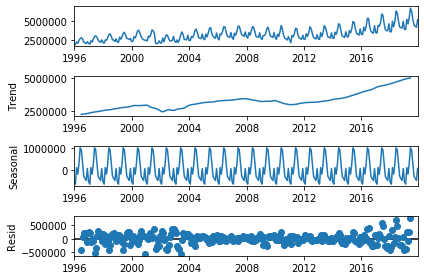

In [7]:
series = travel_pivot
result = seasonal_decompose(series, model='additive')
result.plot()
plt.show()

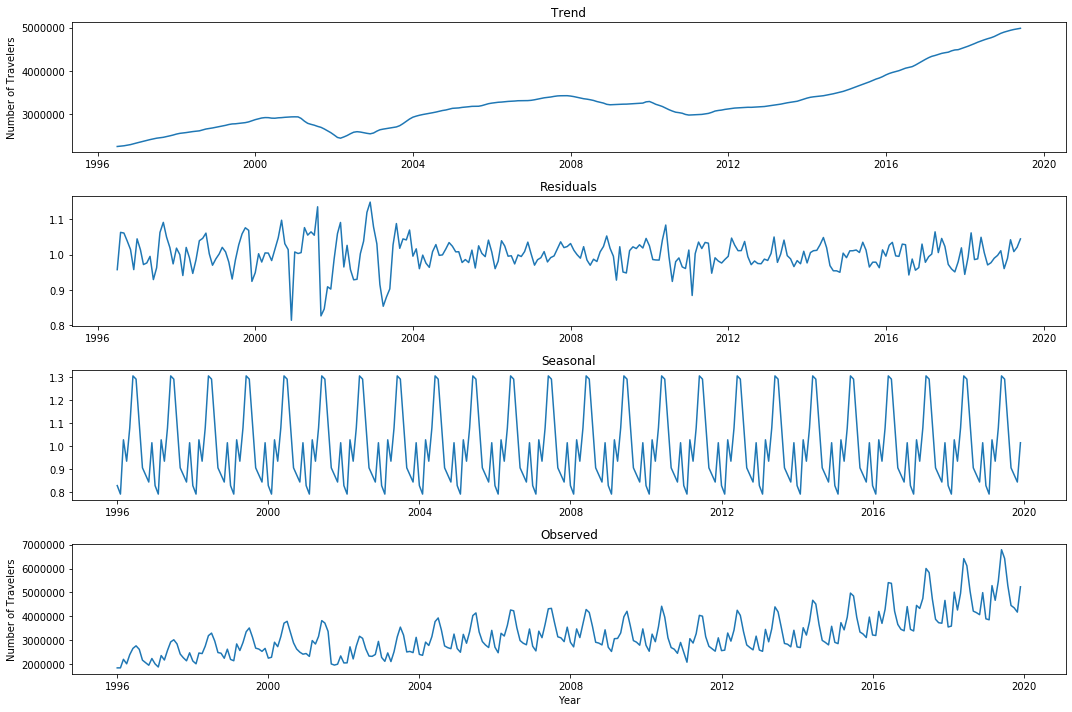

In [20]:

series = travel_pivot
result = seasonal_decompose(series, model='multiplicative')

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))
ax1.plot(result.trend)
ax1.set_title("Trend")
ax1.set_ylabel("Number of Travelers")
ax2.plot(result.resid)
ax2.set_title("Residuals")
ax3.plot(result.seasonal)
ax3.set_title("Seasonal")
ax4.plot(result.observed)
ax4.set_title("Observed")
ax4.set_xlabel("Year")
ax4.set_ylabel("Number of Travelers")
plt.tight_layout()
plt.show()